# 参考
- https://github.com/msamunetogetoge/masamune/blob/master/EM_bayes_regression.ipynb
- https://masamunetogetoge.com/bayes-linear-reg-with-em

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
import pandas as pd

In [2]:
n=10
x=np.linspace(-10,10,n)
noize = np.random.normal(loc=0, scale=3,size=(n,1)).flatten()
y=10+3*x+5*x**2 + x**3
y=y+noize
df=pd.DataFrame(data=np.array([y,np.ones(len(x)), x, x**2 , x**3 ]).T, columns=["y", "const", "x", "x^2", "x^3"])
X=df[[ "const", "x", "x^2", "x^3"]]
X.head()

,const,x,x^2,x^3
0,1.0,-10.000000,100.000000,-1000.000000
1,1.0,-7.777778,60.493827,-470.507545
2,1.0,-5.555556,30.864198,-171.467764
3,1.0,-3.333333,11.111111,-37.037037
4,1.0,-1.111111,1.234568,-1.371742


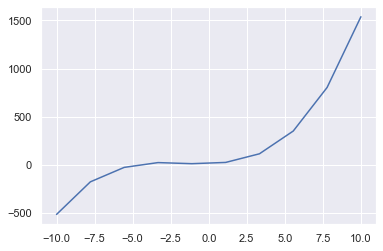

In [3]:
plt.plot(df["x"], df["y"])

In [4]:
class EM_bayes():
    def __init__(self,N,M):
        self.N=N
        self.M=M

    def Estep(self, x,y, a,b):
        S_N = np.linalg.inv(a*np.eye(self.M) +b *np.dot(x.T,x))
        m_N = b*np.dot(S_N ,np.dot(x.T,y))
        self.E_w= np.dot(m_N.T, m_N)+np.trace(S_N)
        self.E_t=  np.linalg.norm(y-np.dot(x, m_N),ord=2) +np.trace(np.dot(np.dot(x.T, x),S_N) )
        E=(self.M/2)*np.log(a/(2*np.pi) )-(a/2)*self.E_w +(self.N/2)*np.log(b/(2*np.pi ))-(b/2)*self.E_t
        return [self.E_w, self.E_t,E]

    def Mstep(self, x,y,a,b):
        self.a_new = self.M/self.E_w
        self.b_new = self.N/self.E_t
    
   

    def Calc(self,x,y):
        [a,b]=np.abs(np.random.randn(2))
        [_,_,self.E_old]=self.Estep(x, y, a, b)
        self.Mstep(x, y, a, b )
        [_,_,self.E_new] = self.Estep(x, y, self.a_new, self.b_new )
        count=1
        sigma=[]
        m=[]

        while (np.abs(self.E_new -self.E_old)>0.0001 ) and (count<100) :
            self.Mstep( x,y,self.a_new, self.b_new) 
            self.S_N = np.linalg.inv(self.a_new *np.eye(self.M) +self.b_new *np.dot(x.T,x))
            self.m_N = self.b_new*np.dot(self.S_N ,np.dot(x.T,y))
            #self.S_N = 1/(self.a_new +self.b_new *np.dot(x.T,x))
            #self.m_N = self.b_new*self.S_N *np.dot(x.T,y)
            sigma.append(self.S_N)
            m.append(self.m_N)
            self.E_old = self.E_new
            [_,_,self.E_new] = self.Estep(x,y,self.a_new,self.b_new )    
            count+=1 
            print("Lilelihood={}".format(self.E_new))    
        else:
            print("Convergence !")
            
        return [self.E_new, sigma,m]

In [5]:
M=len(X.columns)
em = EM_bayes(N=n,M=M )
[E,sigma,m]=em.Calc(X,y)
m=np.array(m).reshape(-1,M)
sigma = np.array(sigma).reshape(-1,M,M)

Lilelihood=-27.733368002670282
Lilelihood=-27.655734649421372
Lilelihood=-27.62512040644412
Lilelihood=-27.612987471380755
Lilelihood=-27.6081652719003
Lilelihood=-27.6062462889145
Lilelihood=-27.60548223627756
Lilelihood=-27.60517796085052
Lilelihood=-27.605056776337804
Lilelihood=-27.605008510262383
Convergence !


In [6]:
np.set_printoptions(precision=3)
a_0 = m[:,0]
a_1 = m[:,1]
a_2 = m[:,2]
a_3 = m[:,3]
sig_0 = sigma[:,0,0]
sig_1 = sigma[:,1,1]
sig_2 = sigma[:,2,2]
sig_3 = sigma[:,3,3]

In [7]:
print("a_0 sequence is {}".format(a_0)) 
print("a_1 sequence is {}".format(a_1))

a_0 sequence is [8.981 8.984 8.986 8.986 8.987 8.987 8.987 8.987 8.987 8.987]
a_1 sequence is [2.949 2.949 2.949 2.949 2.949 2.949 2.949 2.949 2.949 2.949]


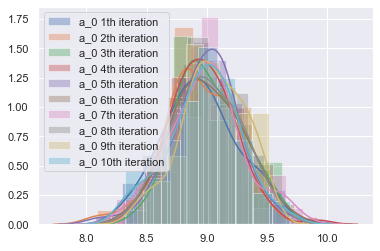

In [8]:
for i in range(len(a_0)):
    sns.distplot(np.random.normal(loc=a_0[i], scale=sig_0[i],size=(100,1)),label="a_0 {}th iteration".format(i+1) )
plt.legend()    
plt.savefig("a_0dist.png")

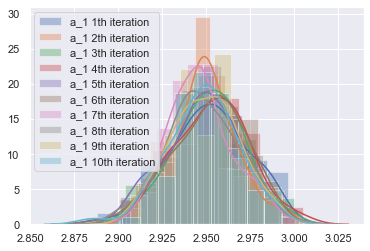

In [9]:
for i in range(len(a_1)):
    sns.distplot(np.random.normal(loc=a_1[i], scale=sig_1[i],size=(100,1)),label="a_1 {}th iteration".format(i+1) )
plt.legend()    
plt.savefig("a_1dist.png")

In [10]:
[[a_0, a_1, a_2, a_3]] =np.random.multivariate_normal(mean=m[-1], cov=sigma[-1],size=1)

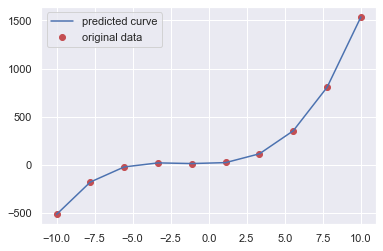

In [11]:
Y=a_0+a_1*x + a_2*x**2 + a_3*x**3
plt.plot(x,Y, label="predicted curve")
plt.scatter(x,y, label="original data", c="r")
plt.legend()
plt.savefig("predict.png")

# オリジナルデータに適用

In [12]:
df = pd.read_excel("../../data/data_covid_fix_name.xlsx")
df = df.dropna().reset_index(drop=True)

In [13]:
df.head()

,country,pop,urb,gdp,dist,hf,pf,ef,date_first,detection,status,cumul,air
0,Albania,2866376,60.319,13364.155397,6.996524e+06,7.84,8.005411,7.67,70,74.3,1,108641,303.14
1,Algeria,42228429,72.629,15481.787620,9.108277e+06,4.99,5.201489,4.77,58,12.0,1,80272,6442.44
2,Angola,30809762,65.514,6452.355165,1.049012e+07,5.40,5.979936,4.83,83,17.9,1,303691,76.94
3,Argentina,44494502,91.870,20610.568550,1.902562e+07,6.86,8.044600,5.67,65,74.9,1,92122,1516.63
4,Australia,24992369,86.012,51663.365095,7.608913e+06,8.62,9.160533,8.07,26,97.3,1,1347,75667.65


In [14]:
X = df.iloc[:, [1,2,3,4,5,9,12]]
X = np.log(X)
"""X["const"] = np.ones(len(X))
X = X.iloc[:, [7,0,1,2,3,4,5,6]]"""
X.head()

,pop,urb,gdp,dist,hf,detection,air
0,14.868559,4.099647,9.500331,15.760924,2.059239,4.308111,5.714195
1,17.558604,4.285364,9.647420,16.024694,1.607436,2.484907,8.770663
2,17.243342,4.182264,8.772200,16.165944,1.686399,2.884801,4.343026
3,17.610876,4.520375,9.933559,16.761297,1.925707,4.316154,7.324246
4,17.034081,4.454487,10.852504,15.844831,2.154085,4.577799,11.234106


In [15]:
y = np.log(df["date_first"])
y.head()

0    4.248495
1    4.060443
2    4.418841
3    4.174387
4    3.258097
Name: date_first, dtype: float64

In [16]:
n = len(X)
M=len(X.columns)

em = EM_bayes(N=n,M=M )
[E,sigma,m]=em.Calc(X,y)
m=np.array(m).reshape(-1,M)
sigma = np.array(sigma).reshape(-1,M,M)

Lilelihood=65.98649329299417
Lilelihood=68.38127185232015
Lilelihood=68.39045893969912
Lilelihood=68.38318117466683
Lilelihood=68.38084799875995
Lilelihood=68.38021118001623
Lilelihood=68.38004165723542
Lilelihood=68.37999672873828
Convergence !


In [17]:
m.shape

(8, 7)

In [18]:
sigma.shape

(8, 7, 7)

In [19]:
np.set_printoptions(precision=3)
a_0 = m[:,0]
a_1 = m[:,1]
a_2 = m[:,2]
a_3 = m[:,3]
a_4 = m[:,4]
a_5 = m[:,5]
a_6 = m[:,6]
#a_7 = m[:,7]

sig_0 = sigma[:,0,0]
sig_1 = sigma[:,1,1]
sig_2 = sigma[:,2,2]
sig_3 = sigma[:,3,3]
sig_4 = sigma[:,4,4]
sig_5 = sigma[:,5,5]
sig_6 = sigma[:,6,6]
#sig_7= sigma[:,7,7]

In [20]:
print("a_0 sequence is {}".format(a_0)) 
print("a_1 sequence is {}".format(a_1))

a_0 sequence is [-0.027 -0.027 -0.027 -0.027 -0.027 -0.027 -0.027 -0.027]
a_1 sequence is [-0.062 -0.063 -0.064 -0.064 -0.064 -0.064 -0.064 -0.064]


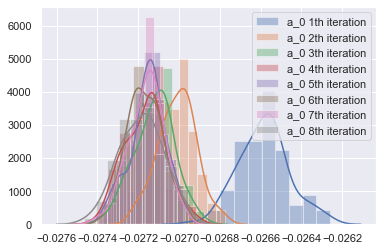

In [21]:
for i in range(len(a_0)):
    sns.distplot(np.random.normal(loc=a_0[i], scale=sig_0[i],size=(100,1)),label="a_0 {}th iteration".format(i+1) )
plt.legend()    
#plt.savefig("a_0dist.png")

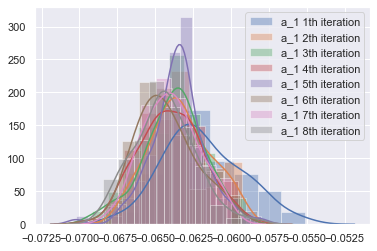

In [22]:
for i in range(len(a_1)):
    sns.distplot(np.random.normal(loc=a_1[i], scale=sig_1[i],size=(100,1)),label="a_1 {}th iteration".format(i+1) )
plt.legend()    

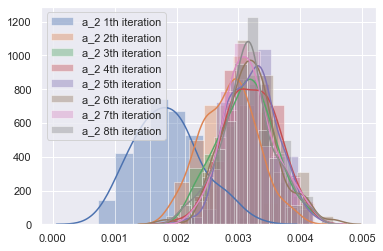

In [23]:
for i in range(len(a_2)):
    sns.distplot(np.random.normal(loc=a_2[i], scale=sig_2[i],size=(100,1)),label="a_2 {}th iteration".format(i+1) )
plt.legend()    

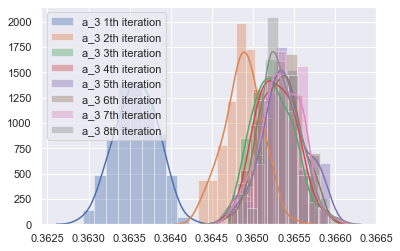

In [24]:
for i in range(len(a_3)):
    sns.distplot(np.random.normal(loc=a_3[i], scale=sig_3[i],size=(100,1)),label="a_3 {}th iteration".format(i+1) )
plt.legend()    

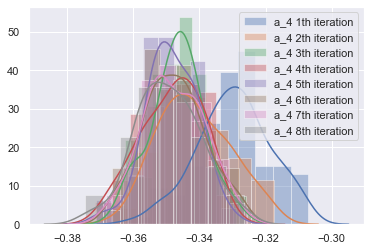

In [25]:
for i in range(len(a_4)):
    sns.distplot(np.random.normal(loc=a_4[i], scale=sig_4[i],size=(100,1)),label="a_4 {}th iteration".format(i+1) )
plt.legend()    

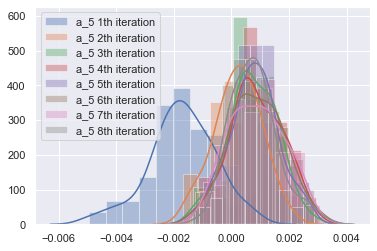

In [26]:
for i in range(len(a_5)):
    sns.distplot(np.random.normal(loc=a_5[i], scale=sig_5[i],size=(100,1)),label="a_5 {}th iteration".format(i+1) )
plt.legend()    

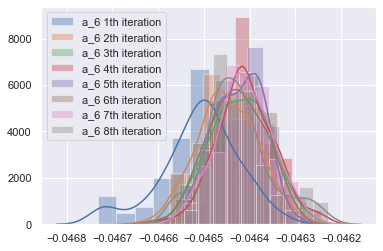

In [27]:
for i in range(len(a_6)):
    sns.distplot(np.random.normal(loc=a_6[i], scale=sig_6[i],size=(100,1)),label="a_6 {}th iteration".format(i+1) )
plt.legend()    

In [28]:
[[a_0, a_1, a_2, a_3,a_4, a_5, a_6]] =np.random.multivariate_normal(mean=m[-1], cov=sigma[-1],size=1)

(array([ 4., 14.,  5.,  1.,  7., 42., 35., 33.,  7.,  2.]),
 array([ 14. ,  22.8,  31.6,  40.4,  49.2,  58. ,  66.8,  75.6,  84.4,
         93.2, 102. ]),
 <a list of 10 Patch objects>)

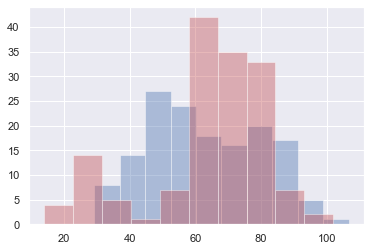

In [29]:
Y=a_0*X["pop"]+a_1*X["urb"]+a_2*X["gdp"]+a_3*X["dist"]+a_4*X["hf"]+a_5*X["detection"]+a_6*X["air"]

plt.hist(np.exp(Y), alpha=0.4,label="predicted curve", color="b")
plt.hist(np.exp(y), alpha=0.4,label="original data", color="r")